In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

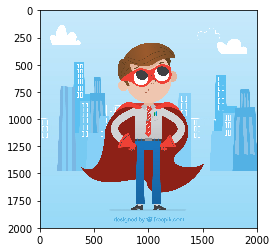

In [94]:
img = cv2.imread("/home/ramendra/Desktop/ML-new-/img.jpg")
import matplotlib.pyplot as plt
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [95]:
from sklearn.cluster import KMeans

In [96]:
kmeans = KMeans(n_clusters=8, random_state=2)

In [97]:
o_img = img.copy()
c_img = img.copy()
c_img = np.reshape(c_img,(-1,3))
o_img.shape

(2000, 2000, 3)

In [98]:
kmeans.fit(c_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [102]:
centers = kmeans.cluster_centers_

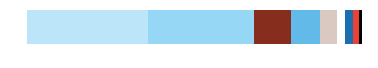

In [106]:
per = np.asarray(np.unique(kmeans.labels_, return_counts=True)[1], dtype='float32')
per = per / c_img.shape[0]
per
dom = [[per[ix], centers[ix]] for ix in range(kmeans.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3)).astype(int)

start = 0
for cx in range(kmeans.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()

In [107]:
centers = np.array(centers, dtype='uint8')

In [108]:
print(centers)

[[151 215 246]
 [135  45  29]
 [188 229 250]
 [ 26 110 175]
 [234  65  54]
 [218 201 193]
 [253 254 254]
 [ 98 186 233]]


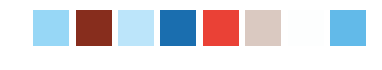

In [109]:
i=1
plt.figure(0, figsize=(9,2))

colors = []

for each_col in centers:
    plt.subplot(1,12,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
    
plt.show()

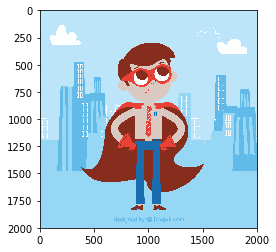

In [110]:
for ix in range(c_img.shape[0]):
    c_img[ix] = colors[kmeans.labels_[ix]]

c_img = c_img.reshape(o_img.shape)  
plt.imshow(c_img)
plt.show()